# Análisis Descriptivo

a continuación se presenta una descripción y visualización de los datos

In [10]:
#IMPORTS

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

In [4]:
#DATABASE CONNECTION

#file_path = r"linkedindatabase.db"
file_path = r"C:\Users\Sarah\Code\ProyectoABD\database\linkedindatabase.db"
conn = sqlite3.connect(file_path)

In [31]:
df = pd.read_sql('SELECT * FROM clean_numerical_postings', conn)

df = df[df['max_salary'] <= 10000000]
df = df[df['min_salary'] <= 10000000]
df = df[df['normalized_salary'] <= 10000000]

df = df[df['max_salary'] > 100]
df = df[df['min_salary'] > 100]
df = df[df['normalized_salary'] > 100]

df.head()



,job_id,max_salary,pay_period,views,med_salary,min_salary,applies,original_listed_time,expiry,closed_time,listed_time,currency,normalized_salary
0,921716,41600.0,HOURLY,20.0,NaN,35360.0,2.0,1713397508000,1715989508000,NaN,1713397508000,USD,38480.0
1,1829192,104000.0,HOURLY,1.0,NaN,62400.0,NaN,1712857887000,1715449887000,NaN,1712857887000,USD,83200.0
2,10998357,65000.0,YEARLY,8.0,NaN,45000.0,NaN,1713277614000,1715869614000,NaN,1713277614000,USD,55000.0
3,23221523,175000.0,YEARLY,16.0,NaN,140000.0,NaN,1712895812000,1715487812000,NaN,1712895812000,USD,157500.0
4,35982263,80000.0,YEARLY,3.0,NaN,60000.0,NaN,1713451943000,1716043943000,NaN,1713451943000,USD,70000.0


In [26]:
#FUNCTIONS

#Convert dict to Markdown table
def dict_to_markdown(data):
    headers= "| " + " | ".join(data.keys()) + " |"
    separator = "| " + " | ".join(["---"]*len(data)) + " |"
    rows = []
    for i in range(len(next(iter(data.values())))):
        row = "| " + " | ".join(f"{data[key][i]:,}" if isinstance(data[key][i], float) else str(data[key][i])for key in data) + " |"
        rows.append(row)
    return "\n".join([headers, separator] + rows)

## Análisis Estadístico Básico

se realiza un análisis estadístico básico para los siguientes atributos de cada publicación de trabajo:

* Rango Salarial ofrecido para el puesto
* Número de vistas
* Número de aplicaciones recibidas
* Duración de la publicación

se visualizan algunas medidas de centralización y de dispersión

### Rango salarial

In [6]:
nor_salary_insights = df[df['normalized_salary'].notnull()]
nor_salary_insights = nor_salary_insights.sort_values(by='normalized_salary', ascending=False)
nor_salary_insights = nor_salary_insights[nor_salary_insights['normalized_salary'] != 0]
nor_salary_insights.rename(columns={'normalized_salary': 'salary'}, inplace=True)
nor_salary_insights['category'] = 'normalized_salary'

max_salary_insights = df[df['max_salary'].notnull()]
max_salary_insights = max_salary_insights.sort_values(by='max_salary', ascending=False)
max_salary_insights = max_salary_insights[max_salary_insights['max_salary'] != 0]
max_salary_insights.rename(columns={'max_salary': 'salary'}, inplace=True)
max_salary_insights['category'] = 'max_salary'

min_salary_insights = df[df['min_salary'].notnull()]
min_salary_insights = min_salary_insights.sort_values(by='min_salary', ascending=False)
min_salary_insights = min_salary_insights[min_salary_insights['min_salary'] != 0]
min_salary_insights.rename(columns={'min_salary': 'salary'}, inplace=True)
min_salary_insights['category'] = 'min_salary'

salary_combined = pd.concat([nor_salary_insights, max_salary_insights, min_salary_insights], ignore_index=True)


In [ ]:
#mean salary

mean_salary = nor_salary_insights['salary'].mean()
mean_salary_max = max_salary_insights['salary'].mean()
mean_salary_min = min_salary_insights['salary'].mean()

#median salary

median_salary = nor_salary_insights['salary'].median()
median_salary_max = max_salary_insights['salary'].median()
median_salary_min = min_salary_insights['salary'].median()

#mode salary

mode_salary = nor_salary_insights['salary'].mode()
mode_salary_max = max_salary_insights['salary'].mode()
mode_salary_min = min_salary_insights['salary'].mode()


cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Salario medio': [int(mean_salary), median_salary, float(mode_salary[0])],
    'Salario máximo': [int(mean_salary_max), median_salary_max, float(mode_salary_max[0])],
    'Salario mínimo': [int(mean_salary_min), median_salary_min, float(mode_salary_min[0])]
}

markdown_table = dict_to_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))


| Medida | Salario medio | Salario máximo | Salario mínimo |
| --- | --- | --- | --- |
| Promedio | 103200 | 163578 | 127983 |
| Mediana | 90,000.0 | 104,000.0 | 78,200.0 |
| Moda | 100,000.0 | 150,000.0 | 100,000.0 |

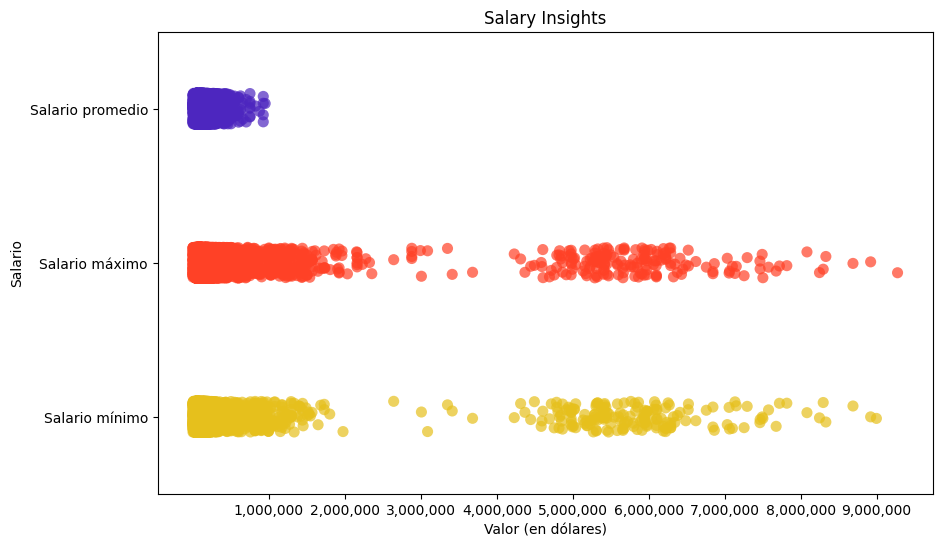

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='salary', y='category', data=salary_combined, jitter=True, size=8, hue='category',palette='CMRmap', alpha=0.7)

plt.xticks(ticks=np.arange(1000000, 10000000, 1000000), labels=[f'{i:,.0f}' for i in np.arange(1000000, 10000000, 1000000)])
plt.yticks(ticks=[0, 1, 2], labels=['Salario promedio', 'Salario máximo', 'Salario mínimo'])
plt.xlabel('Valor (en dólares)')
plt.ylabel('Salario')
plt.title('Salary Insights')

plt.show()

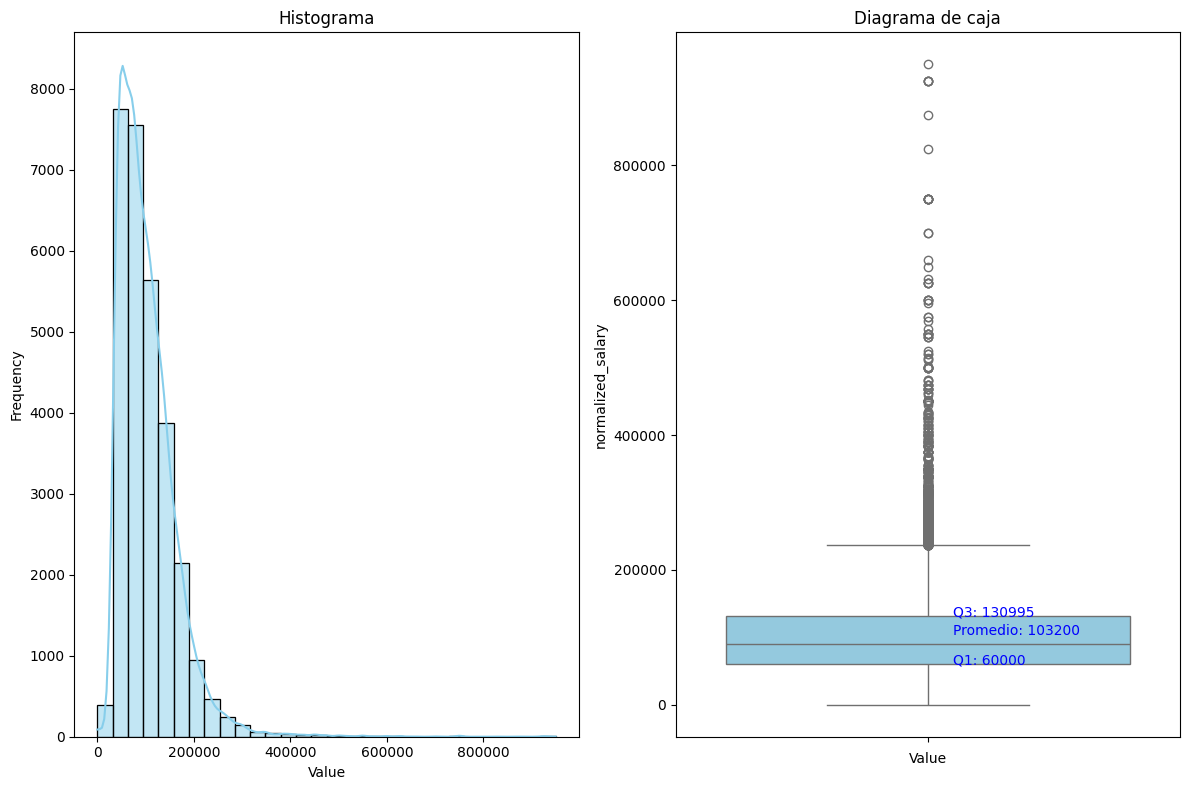

In [39]:
salary = df['normalized_salary'].dropna()
# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(salary, kde=True, color='skyblue', bins=30)
plt.title('Histograma')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Calculate mean and quartiles
mean_value = np.mean(salary)
q1 = np.percentile(salary, 25)
q3 = np.percentile(salary, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=salary, color='skyblue', orient='v')
plt.title('Diagrama de caja')
plt.xlabel('Value')

# Annotate the mean and quartile values on the boxplot
plt.text(0.05, mean_value, f'Promedio: {mean_value:.0f}', color='blue', fontsize=10)
plt.text(0.05, q1, f'Q1: {q1:.0f}', color='blue', fontsize=10)
plt.text(0.05, q3, f'Q3: {q3:.0f}', color='blue', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

### Visitas

In [22]:
views = df['views'].dropna()

In [25]:
#mean views
mean_views = views.mean()

#median views
median_views = views.median()

#mode views
mode_views = views.mode()

cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Número de vistas': [mean_views, median_views, mode_views[0]],
}

markdown_table = dict_to_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))


| Medida | Número de vistas |
| --- | --- |
| Promedio | 21.302978018565167 |
| Mediana | 5.0 |
| Moda | 4.0 |

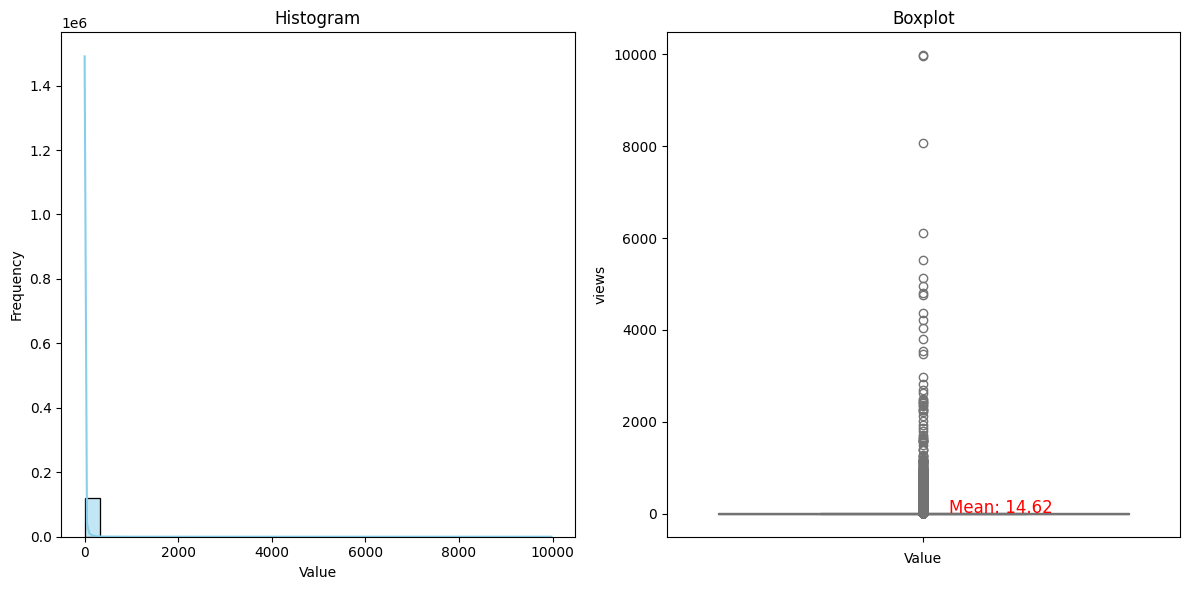

In [ ]:

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(views, kde=True, color='skyblue', bins=30)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Calculate mean and quartiles
mean_value = np.mean(views)
q1 = np.percentile(views, 25)
q3 = np.percentile(views, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=views, color='lightgreen')
plt.title('Boxplot')
plt.xlabel('Value')

# Annotate the mean and quartile values on the boxplot
plt.text(0.05, mean_value, f'Mean: {mean_value:.2f}', color='red', fontsize=12)
plt.text(0.05, q1, f'Q1: {q1:.2f}', color='blue', fontsize=12)
plt.text(0.05, q3, f'Q3: {q3:.2f}', color='blue', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### Aplicaciones por puesto

In [32]:
apps = df['applies'].dropna()

In [ ]:
#mean apps
mean_apps = apps.mean()

#median apps
median_apps = apps.median()

#mode apps
mode_apps = apps.mode()

cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Número de aplicaciones': [int(mean_apps), median_apps, mode_apps[0]],
}

markdown_table = dict_to_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))

| Medida | Número de aplicaciones |
| --- | --- |
| Promedio | 12 |
| Mediana | 3.0 |
| Moda | 1.0 |

### Duración de la publicación

In [ ]:
conn.close()